# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np


In [15]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

In [16]:
# frequency table for prestige and whether or not someone was admitted
print df.prestige.value_counts()
print df.admit.value_counts()

2.0    148
3.0    121
4.0     67
1.0     61
Name: prestige, dtype: int64
0    271
1    126
Name: admit, dtype: int64


## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [33]:
#df = df.join(pd.get_dummies(df['prestige'],prefix='prestige'))
#df.head()
#df['prestige'] = [int(df['prestige'])]
dummy_ranks = pd.get_dummies(df['prestige'],prefix='prestige')
dummy_ranks.head()

,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


#### 2.2 When modeling our class variables, how many do we need? 



Answer: n-1=3

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [27]:
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_1':])
print handCalc.head()

   admit    gre   gpa  prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             0             1             0
1      1  660.0  3.67             0             0             1             0
2      1  800.0  4.00             1             0             0             0
3      1  640.0  3.19             0             0             0             1
4      0  520.0  2.93             0             0             0             1


In [37]:
#crosstab prestige 1 admission 
# frequency table cutting prestige and whether or not someone was admitted
pd.crosstab(handCalc['admit'], handCalc['prestige_1.0'])

prestige_1.0,0,1
admit,,
0,243,28
1,93,33


#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [ ]:
33/28=1.18

#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [ ]:
93/243=0.38

#### 3.3 Calculate the odds ratio

In [ ]:
1.18/0.38=3.1

#### 3.4 Write this finding in a sentenance: 

Answer: The odds of getting adimtted to the program is 3 times higher if the student attened #1 ranked college compared to #4 ranked college

#### 3.5 Print the cross tab for prestige_4

In [39]:
pd.crosstab(handCalc['admit'], handCalc['prestige_4.0'])

prestige_4.0,0,1
admit,,
0,216,55
1,114,12


#### 3.6 Calculate the OR 

In [42]:
(float(12)/55)/(float(114)/216)

0.4133971291866028

#### 3.7 Write this finding in a sentence

Answer:The odds of getting adimtted to the program if the student attened #4 ranked college is 0.4 times the odds if the student attended #1 ranked college

## Part 4. Analysis

In [44]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.loc[:, 'prestige_2':])
print data.head()

   admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             1             0
1      1  660.0  3.67             0             1             0
2      1  800.0  4.00             0             0             0
3      1  640.0  3.19             0             0             1
4      0  520.0  2.93             0             0             1


We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [45]:
# manually add the intercept
data['intercept'] = 1.0

#### 4.1 Set the covariates to a variable called train_cols

In [53]:
train_cols =  data[['gre', 'gpa', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0']]
train_cols.head()


,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0
0,380.0,3.61,0,1,0
1,660.0,3.67,0,1,0
2,800.0,4.00,0,0,0
3,640.0,3.19,0,0,1
4,520.0,2.93,0,0,1


#### 4.2 Fit the model

In [58]:
##data.head()
x = data[['intercept','gre', 'gpa', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0']]
y = data['admit']
lm = sm.Logit(y, x)
result = lm.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


#### 4.3 Print the summary results

In [59]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Tue, 05 Dec 2017   Pseudo R-squ.:                 0.08166
Time:                        18:02:13   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       -3.8769      1.142     -3.393      0.001      -6.116      -1.638
gre              0.0022      0.001      2.028      0.043    7.44e-05       0.004
gpa              0.7793      0.333      2.344      0.019       0.128       1.431
prestige_2.0    -0.6801      0.317     -2.146      0.032      -1.301      -0.059
prestige_3.0    -1.3387      0.345     -3.882      0.000      -2.015      -0.663
prestige_4.0    -1.5534      0.417     -3.721      0.000      -2.372      -0.735
================================================================================
"""

#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [64]:
np.exp(result.params)

intercept       0.020716
gre             1.002221
gpa             2.180027
prestige_2.0    0.506548
prestige_3.0    0.262192
prestige_4.0    0.211525
dtype: float64

In [73]:
conf=result.conf_int()
conf['OR'] = result.params
conf.columns = ['2.5%', '97.5%', 'OR']
np.exp(conf)

,2.5%,97.5%,OR
intercept,0.002207,0.194440,0.020716
gre,1.000074,1.004372,1.002221
gpa,1.136120,4.183113,2.180027
prestige_2.0,0.272168,0.942767,0.506548
prestige_3.0,0.133377,0.515419,0.262192
prestige_4.0,0.093329,0.479411,0.211525


#### 4.5 Interpret the OR of Prestige_2

Answer: The odds of getting adimtted to the program if the student atteneds #2 ranked college is 0.5 times the odds if the student attended #1 ranked college

#### 4.6 Interpret the OR of GPA

Answer: For every unit increase in gpa the odds of getting admitted increases by 1.13

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [74]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [75]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


In [78]:
combos.head()

,0,1,2,3
0,220.0,2.260000,1.0,1.0
1,220.0,2.260000,2.0,1.0
2,220.0,2.260000,3.0,1.0
3,220.0,2.260000,4.0,1.0
4,220.0,2.453333,1.0,1.0


In [80]:
combos.columns=['gre','gpa','prestige','intercept']
combos.head()

,gre,gpa,prestige,intercept
0,220.0,2.260000,1.0,1.0
1,220.0,2.260000,2.0,1.0
2,220.0,2.260000,3.0,1.0
3,220.0,2.260000,4.0,1.0
4,220.0,2.453333,1.0,1.0


#### 5.1 Recreate the dummy variables

In [85]:
# recreate the dummy variables
dummy_ranks_new=pd.get_dummies(combos['prestige'], prefix='prestige')

# keep only what we need for making predictions
cols_to_keep2 = ['gre', 'gpa']
data2 = combos[cols_to_keep2].join(dummy_ranks_new.loc[:, 'prestige_2':])
data2['intercept'] = 1.0
print data2.head()


     gre       gpa  prestige_2.0  prestige_3.0  prestige_4.0  intercept
0  220.0  2.260000             0             0             0        1.0
1  220.0  2.260000             1             0             0        1.0
2  220.0  2.260000             0             1             0        1.0
3  220.0  2.260000             0             0             1        1.0
4  220.0  2.453333             0             0             0        1.0


#### 5.2 Make predictions on the enumerated dataset

In [88]:
x2 = data2[['intercept','gre', 'gpa', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0']]

data2['admit'] = result.predict(x2)
data2.tail()

,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0,intercept,admit
395,800.0,3.806667,0,0,1,1.0,0.334286
396,800.0,4.000000,0,0,0,1.0,0.734040
397,800.0,4.000000,1,0,0,1.0,0.582995
398,800.0,4.000000,0,1,0,1.0,0.419833
399,800.0,4.000000,0,0,1,1.0,0.368608


#### 5.3 Interpret findings for the last 4 observations

Answer: With both gre and gpa being equal at maxium possible values, #1 rank school has 73%, #2 rank school 58%, #3 rank school 41% and #4 rank school 36% probability of admission.

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

In [171]:
chart1 = data2.groupby(['gre']).mean()
chart1

,gpa,prestige_2.0,prestige_3.0,prestige_4.0,intercept,admit
gre,,,,,,
220.000000,3.13,0.25,0.25,0.25,1.0,0.159771
284.444444,3.13,0.25,0.25,0.25,1.0,0.178293
348.888889,3.13,0.25,0.25,0.25,1.0,0.198330
413.333333,3.13,0.25,0.25,0.25,1.0,0.219884
477.777778,3.13,0.25,0.25,0.25,1.0,0.242936
542.222222,3.13,0.25,0.25,0.25,1.0,0.267440
606.666667,3.13,0.25,0.25,0.25,1.0,0.293328
671.111111,3.13,0.25,0.25,0.25,1.0,0.320502
735.555556,3.13,0.25,0.25,0.25,1.0,0.348843


In [174]:
chart1.index.values

array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
        477.77777778,  542.22222222,  606.66666667,  671.11111111,
        735.55555556,  800.        ])

In [175]:
chart1.admit.values

array([ 0.15977055,  0.17829277,  0.19832988,  0.21988425,  0.24293582,
        0.26744025,  0.29332772,  0.32050235,  0.3488425 ,  0.3782019 ])

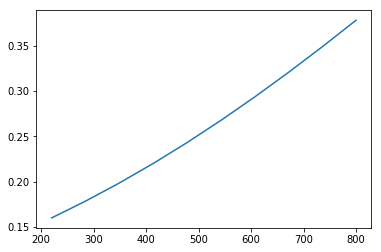

In [176]:
plt.plot(chart1.index.values,chart1.admit.values)
plt.show()

In [177]:
chart2 = data2.groupby(['gpa']).mean()
chart2

,gre,prestige_2.0,prestige_3.0,prestige_4.0,intercept,admit
gpa,,,,,,
2.260000,510.0,0.25,0.25,0.25,1.0,0.154808
2.453333,510.0,0.25,0.25,0.25,1.0,0.173972
2.646667,510.0,0.25,0.25,0.25,1.0,0.194824
2.840000,510.0,0.25,0.25,0.25,1.0,0.217375
3.033333,510.0,0.25,0.25,0.25,1.0,0.241604
3.226667,510.0,0.25,0.25,0.25,1.0,0.267462
3.420000,510.0,0.25,0.25,0.25,1.0,0.294868
3.613333,510.0,0.25,0.25,0.25,1.0,0.323708
3.806667,510.0,0.25,0.25,0.25,1.0,0.353834


In [178]:
chart2.index.values

array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
        3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])

In [179]:
chart2.admit.values

array([ 0.15480847,  0.17397161,  0.19482443,  0.21737513,  0.24160433,
        0.26746248,  0.29486821,  0.32370753,  0.35383426,  0.38507156])

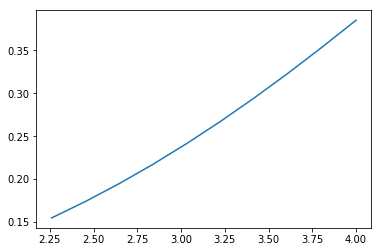

In [180]:
plt.plot(chart2.index.values,chart2.admit.values)
plt.show()